In [64]:
import numpy as np
import pandas as pd

In [65]:
df = pd.read_csv("Churn_Modelling.csv")

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df.shape

(10000, 14)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [71]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [72]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [73]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], dtype=int, drop_first=True)

In [75]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [77]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [92]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [127]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [130]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7173 - loss: 2.0413 - val_accuracy: 0.7619 - val_loss: 1.6718
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7510 - loss: 1.4568 - val_accuracy: 0.7688 - val_loss: 1.0815
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 1.0002 - val_accuracy: 0.8025 - val_loss: 1.2672
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.8741 - val_accuracy: 0.7900 - val_loss: 0.6446
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7899 - loss: 0.6022 - val_accuracy: 0.8012 - val_loss: 0.5868
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7843 - loss: 0.5952 - val_accuracy: 0.6169 - val_loss: 1.1801
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 0.9566 - val_accuracy: 0.7731 - val_loss: 0.6348
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7716 - loss: 0.5904 - val_accu

In [131]:
model.layers[0].get_weights()

[array([[-0.13623174,  0.24551238, -0.01141853,  0.19288908, -0.14579815,
          0.08515418, -0.04977658,  0.01706041, -0.0794703 , -0.03906443,
         -0.13723382],
        [ 0.32739687,  0.76843   , -0.69501126,  0.27608183,  0.0664985 ,
         -0.12581286,  0.58438915, -0.05130092, -0.19619966,  0.2612989 ,
          0.25278282],
        [ 0.43392515, -0.14736886, -0.16244763,  0.11104156,  0.5288629 ,
         -0.21895804,  0.23126897, -0.21581727,  0.21698369,  0.19596775,
          0.52580076],
        [-0.07218466, -0.13267174, -0.42366987, -0.0621334 , -0.18084097,
         -0.18648009, -0.25546825, -0.23036496, -0.1326726 ,  0.08020671,
         -0.4507699 ],
        [-0.12726308,  0.21477786,  0.2972601 , -0.2569049 , -0.27879927,
          0.20027253, -0.771244  , -0.6086035 , -0.42967388,  0.7491641 ,
         -0.38932663],
        [-0.3112493 , -0.15612906, -0.30876812, -0.31245536, -0.35164076,
          0.17934965,  0.08721005, -0.02186793, -0.12408953, -0.2333222

In [132]:
model.layers[1].get_weights()

[array([[ 4.90888432e-02,  1.43727288e-01,  9.63442922e-02,
          1.44457355e-01,  1.24807835e-01,  3.28527927e-01,
         -4.44827862e-02,  4.44470882e-01, -1.11318395e-01,
         -1.46430388e-01,  3.98677588e-01],
        [ 4.42301124e-01,  4.66656871e-02,  2.74988919e-01,
          4.41493958e-01, -5.75559437e-02,  4.00790721e-01,
          3.01442742e-01, -2.92412043e-01,  2.07503602e-01,
         -7.38131464e-04, -4.20481950e-01],
        [ 2.60885447e-01,  4.68985260e-01, -2.81650317e-03,
          1.25517562e-01, -7.82737792e-01,  2.04950854e-01,
         -2.27653347e-02, -3.84633899e-01, -1.80094063e-01,
         -1.86240166e-01, -3.02170962e-01],
        [ 4.13458139e-01, -2.22819194e-01, -7.18036771e-01,
         -8.64255205e-02, -2.72294372e-01, -1.35334358e-01,
          6.35306463e-02,  7.95027986e-02, -2.85159856e-01,
         -1.68099880e-01,  4.35719103e-01],
        [ 3.71330202e-01,  3.22324395e-01, -7.35474825e-01,
         -2.97205597e-01,  3.40981572e-03, -

In [133]:
y_log  = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [134]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [135]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [136]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8475

In [137]:
import matplotlib.pyplot as plt

In [138]:
history.history

{'accuracy': [0.7398437261581421,
  0.7579687237739563,
  0.7814062237739563,
  0.7893750071525574,
  0.7925000190734863,
  0.7209374904632568,
  0.7120312452316284,
  0.7774999737739563,
  0.7831249833106995,
  0.7950000166893005,
  0.8043749928474426,
  0.80859375,
  0.8100000023841858,
  0.8101562261581421,
  0.8114062547683716,
  0.8135937452316284,
  0.8135937452316284,
  0.8076562285423279,
  0.8159375190734863,
  0.8204687237739563,
  0.8179687261581421,
  0.8212500214576721,
  0.8217187523841858,
  0.8237500190734863,
  0.8224999904632568,
  0.8243749737739563,
  0.8284375071525574,
  0.8268749713897705,
  0.8307812213897705,
  0.8296874761581421,
  0.8295312523841858,
  0.8315625190734863,
  0.83203125,
  0.8271874785423279,
  0.8354687690734863,
  0.8346874713897705,
  0.8373437523841858,
  0.8385937213897705,
  0.840624988079071,
  0.8396875262260437,
  0.8423437476158142,
  0.8439062237739563,
  0.8446875214576721,
  0.8348437547683716,
  0.8392187356948853,
  0.84437501430

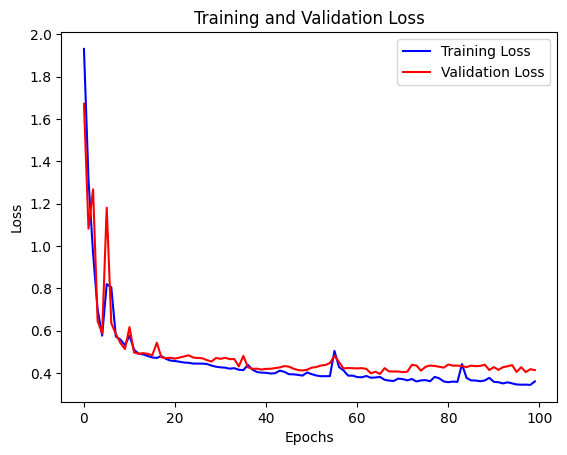

In [141]:
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


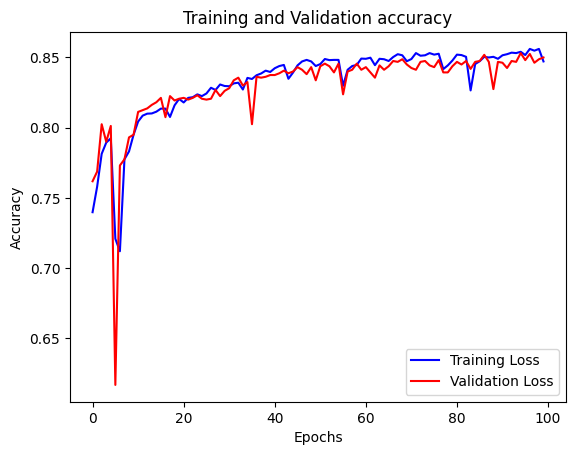

In [142]:
plt.plot(history.history['accuracy'], color='blue', label='Training Loss')
plt.plot(history.history['val_accuracy'], color='red', label='Validation Loss')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()